# Homework 6 - ME 364 (Spring 2022)

For this homework, we use the dataset BIKED, which you were introduced to it before. The only difference in this dataset is that the column Bicycle Model's name has changed into Bike Class. This dataset includes 4,512 manually-designed bicycle models. The goal of the dataset developers is to enable a variety of data-driven design applications for bicycles and support the development of data-driven design methods. The dataset is comprised of a variety of design information including assembly images, component images, numerical design parameters, and class labels. The text explaining the dataset and the figure are coming from paper: https://decode.mit.edu/assets/papers/BIKED.pdf. The dataset include 19 different styles of bicycles. Figure 1 shows a list of styles and the number of samples (and the percentages) for each style in the original dataset. Mountain bikes are abbreviated as "MTB". Bikes classified as "OTHER" are labelled as such by the designer. The "Remaining Label Categories" group contains the remaining 10 explicit categories in descending order of prevalence: BMX, CITY, COMMUTER, CRUISER, HYBRID, TRIALS, CARGO, GRAVEL, CHILDRENS, FAT.

<font color='red'>__Question (1)__</font>: Create a new dataset that only includes bike classes ROAD, MTB, TRACK, OTHER, DIRT_JUMP, TOURING, CYCLOCROSS, and POLO. Your new dataset should still include all the features in the original dataset. You will work with this new dataset.

In [124]:
import pandas as pd

url = 'https://raw.githubusercontent.com/yairg98/Data-Driven-Problem-Solving/main/Homework%206/Biked_Dataset_Reduced.csv'
df = pd.read_csv(url)

df.head()

,SSSIDECX3,SSSIDECX2,SSSIDECX1,SSSIDECY2,SSSIDECY1,STEMBENDS,FRONTROTORBOLTS,Shoe up angle,Down tube front diameter,LRTHICK,...,Top tube type OHCLASS: 1,BRAZEonFDTYPE OHCLASS: FD9000F,BRAZEonFDTYPE OHCLASS: FD9070F,CSAUX3_MM_RATIO OHCLASS: 0,CSAUX3_MM_RATIO OHCLASS: 1,bottle SEATTUBE0 show OHCLASS: False,bottle SEATTUBE0 show OHCLASS: True,bottle DOWNTUBE0 show OHCLASS: False,bottle DOWNTUBE0 show OHCLASS: True,Bicycle_Class
0,0.115968,0.213580,0.240722,0.173913,0.295455,0,0.75,0.906475,0.323077,0,...,1,1,0,1,0,1,0,1,0,ROAD
1,0.115968,0.171084,0.199779,0.173913,0.295455,0,0.75,0.906475,0.293077,0,...,0,1,0,1,0,1,0,1,0,DIRT_JUMP
2,0.115968,0.267053,0.292434,0.173913,0.295455,0,0.75,0.899281,0.246154,0,...,0,1,0,1,0,1,0,1,0,POLO
3,0.115968,0.215305,0.242409,0.173913,0.295455,0,0.75,0.899281,0.246154,0,...,0,1,0,1,0,1,0,1,0,ROAD
4,0.115968,0.233025,0.259668,0.173913,0.295455,0,0.75,0.906475,0.293077,0,...,0,1,0,1,0,1,0,1,0,DIRT_JUMP


<font color='red'>__Question (2)__</font>: This dataset include so many features. Your goal first is to find the most important features to classify the bikes. To do that, you run a logistic regression model for classification and retrieve the coeff property that contains the coefficients found for each input variable. Assuming that you have your data in dataframe called df, you can run the following code snippet to find the top 50 important features. Provide a list of these top 50 features.

```python
from sklearn.linearmodel import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
model = LogisticRegression ( multiclass='multinomial' )
X = np.array(df.iloc[:,:-1])
MinMaxscaler = MinMaxScaler( ) # define min-max scaler
X_in = MinMaxscaler.fittransform(X) # transform data
y = np.array(df['Bicycle_Class'] )
# fit the model
model.fit(X_in , y)
# get importance
importance = model.coef[0]
# Top 50 important features
import numpy as np
importanceABS = np.abs( importance )
importanceABS.argsort()[-50:] [: :-1]
# returns the top 50 important features
df.columns[importanceABS.argsort( )[-50: ][::-1]]
```

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np

model = LogisticRegression ( multi_class='multinomial' )
X = np.array(df.iloc[:,:-1])
MinMaxscaler = MinMaxScaler( ) # define min-max scaler
X_in = MinMaxscaler.fit_transform(X) # transform data
y = np.array(df['Bicycle_Class'] )

# fit the model
model.fit(X_in , y)

# get importance
importance = model.coef_[0]

# Top 50 important features
import numpy as np
importanceABS = np.abs( importance )
importanceABS.argsort()[-50:] [: :-1]

# returns the top 50 important features
top_50 = df.columns[importanceABS.argsort( )[-50: ][::-1]]
print("Top 50 most important features:")
print(*top_50, sep=', ')

Top 50 most important features:
Down tube type OHCLASS: 2, Mountain bar rise, HEADSETprofile OHCLASS: 0, HEADSETprofile OHCLASS: 2, Handlebar style OHCLASS: 1, Down tube type OHCLASS: 1, Seat tube length, SIZE OHCLASS: 20", MATERIAL OHCLASS: STEEL, DERAILLEUR_HANGER, SBLADEW rear, Number of cogs, PRODUCTION, Dropout spacing style OHCLASS: 0, Handlebar style OHCLASS: 0, RIM_STYLE rear OHCLASS: SPOKED, Pedals style OHCLASS: 0, Wall thickness Chain stay, Wall thickness Seat stay, SADDLETIPtoMIDDLE, Pedals style OHCLASS: 1, Saddle height, Dimension units OHCLASS: 0, RIM_STYLE front OHCLASS: TRISPOKE, CLAMPSTYLE OHCLASS: 2, Dimension units OHCLASS: 1, Seatpost LENGTH, RIM_STYLE rear OHCLASS: TRISPOKE, BEND_POSITION, CLAMPSTYLE OHCLASS: 1, Pedal style OHCLASS: 1, nCSAUXISBENT, Dim A TextField, RIM_STYLE front OHCLASS: SPOKED, Fork choice OHCLASS: Generic Straight Blade 50mm, SBLADER rear, Fender strut 2, SAME_SIZED_FRONT_AND_REAR, CSAUXISBENT, MATERIAL OHCLASS: OTHER, FRONTROTOR_INCLUDE, SPO

C:\Users\yairg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<font color='red'>__Question (3)__</font>: Use the top 50 features to develop a Logistic Regression classifier that can predict the bike class based on these features. At this point, your dataset should include the bike classes from question 1 and features from question 2. Provide step-by-step procedure for your model development. Calculate and report the Jaccard Index and F-Score to assess the performance of the model. Provide the confusion matrix and its plot for both training and test data.

In [126]:
# Limit dataframe to only the target and top 50 most important features
# Note that the dataframe was previously filtered by Bicycle_Class
df = df[list(top_50)+['Bicycle_Class']]
df.head()

,Down tube type OHCLASS: 2,Mountain bar rise,HEADSETprofile OHCLASS: 0,HEADSETprofile OHCLASS: 2,Handlebar style OHCLASS: 1,Down tube type OHCLASS: 1,Seat tube length,"SIZE OHCLASS: 20""",MATERIAL OHCLASS: STEEL,DERAILLEUR_HANGER,...,SPOKES composite rear,Saddle type OHCLASS: BMX,SPOKES composite front,SIZE OHCLASS: 20,Fender strut 3,Pedal style OHCLASS: 2,SUSPENSION,Dropout R,FRONTbrake type OHCLASS: Generic caliper,Bicycle_Class
0,1,0.607143,1,0,0,0,0.620730,0,1,1,...,0.1,0,0.1,0,1,1,1,0.0,0,ROAD
1,0,0.383929,0,0,1,1,0.279418,0,0,0,...,0.1,1,0.1,0,1,0,1,0.0,0,DIRT_JUMP
2,0,0.300000,1,0,1,1,0.592577,0,1,0,...,0.1,1,0.1,0,0,0,1,0.0,0,POLO
3,0,0.303571,1,0,0,1,0.485027,0,1,1,...,0.1,0,0.1,0,1,0,1,0.0,0,ROAD
4,0,0.339286,0,0,1,1,0.316322,0,1,0,...,0.1,0,0.1,0,1,0,1,0.0,0,DIRT_JUMP


#### Analyzing the target distribution

Target variable distribution:


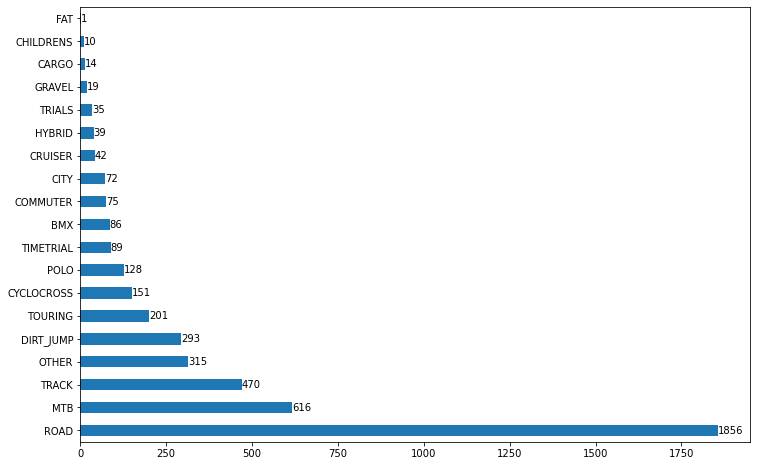

In [127]:
print('Target variable distribution:')

ax = df['Bicycle_Class'].value_counts().plot(kind='barh',figsize=(12,8))
[ax.bar_label(p) for p in ax.containers];

#### Creating the logistic regression classifier and making predictions

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Select x and y data for logistic regression classifier
x_data=np.array(df[top_50])
y_data=df['Bicycle_Class']

# Normalize the data
MinMaxscaler = MinMaxScaler()  # define min max scaler
x_data_scaled = MinMaxscaler.fit_transform(x_data)  # transform data

# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x_data_scaled,y_data,test_size=0.25)

# Instantiate logistic regression classifier
lr = LogisticRegression(max_iter=500)

# Train the model
lr.fit(x_train,y_train)

# Make predictions
yhatTest=lr.predict(x_test)
yhatTrain=lr.predict(x_train)

C:\Users\yairg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluating the model

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [130]:
# Accuracy score
acc_scoreTrain = accuracy_score(y_train,yhatTrain)
acc_scoreTest = accuracy_score(y_test,yhatTest)
print(f'The accuracy for training data is {acc_scoreTrain:0.3f}')
print(f'The accuracy for the test data is {acc_scoreTest:0.3f}')

The accuracy for training data is 0.652
The accuracy for the test data is 0.645


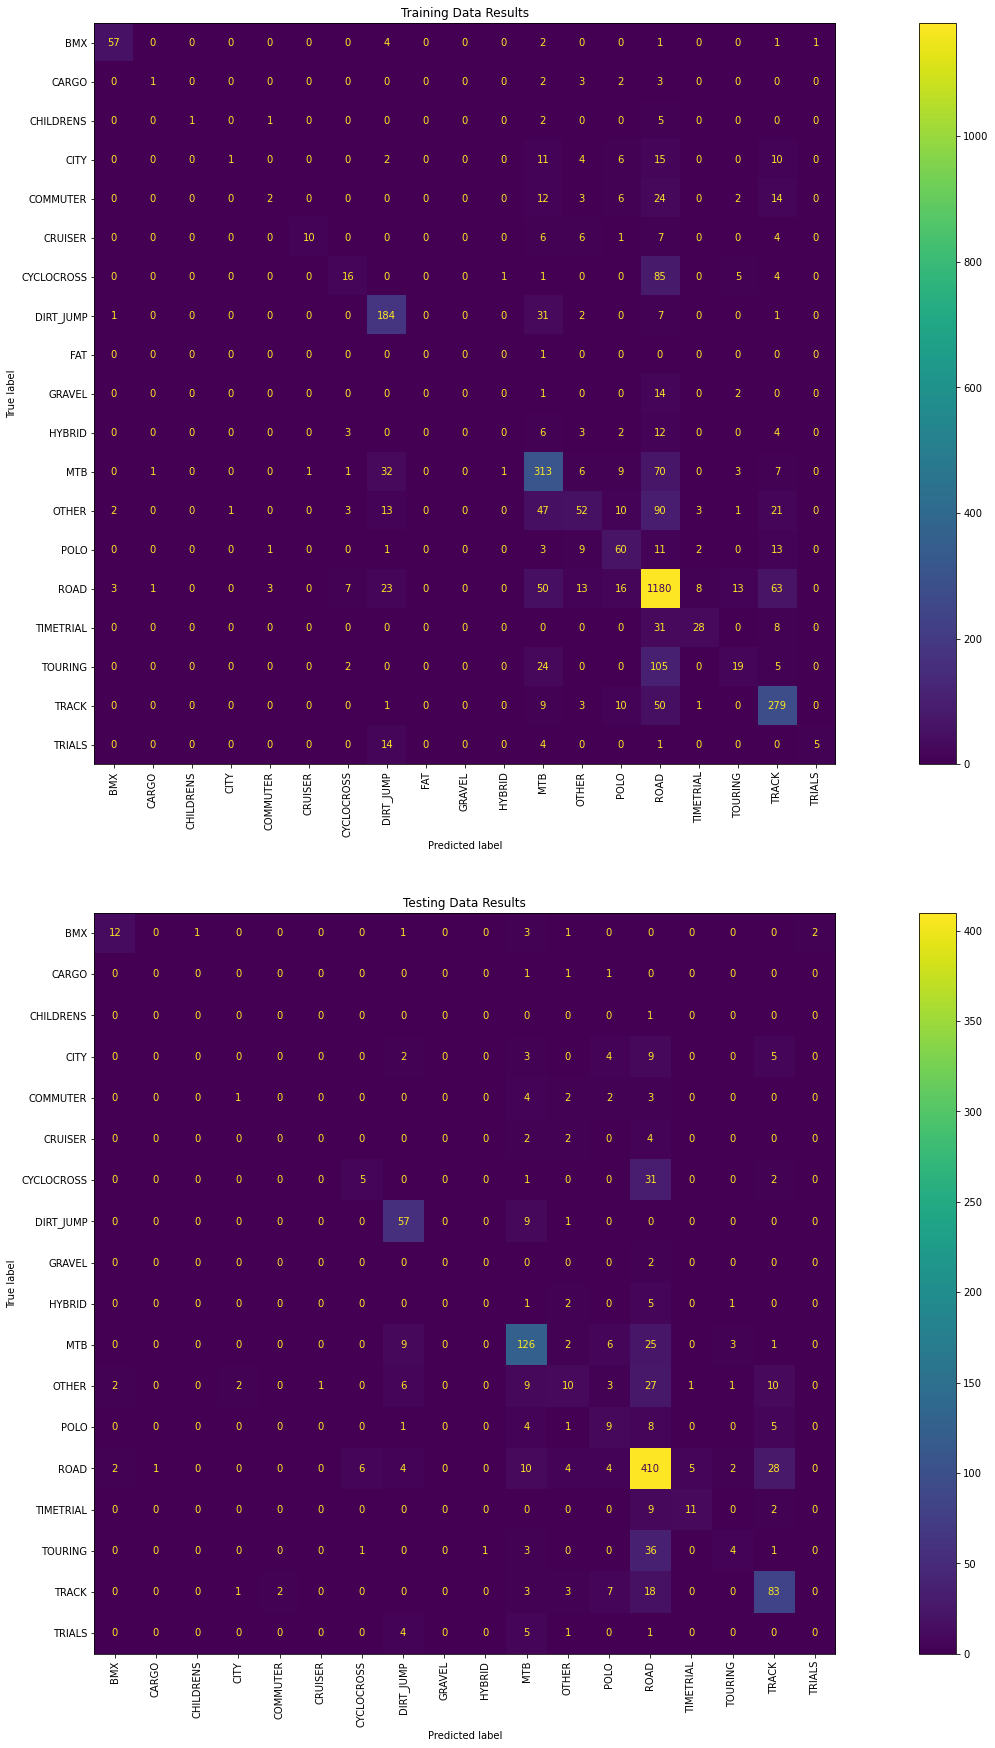

In [131]:
# Create training and testing confusion matrices
CM_scoreTrain = confusion_matrix(y_train,yhatTrain)   # possible option normalize='true'
CM_scoreTest = confusion_matrix(y_test,yhatTest)   # possible option normalize='true'

# Create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30,30))

# Plot training data confusion matrix
labels_train = pd.unique(y_train)
labels_train.sort()
dispTr=ConfusionMatrixDisplay(CM_scoreTrain, display_labels=labels_train)
dispTr.plot(ax=axs[0], xticks_rotation='vertical');
axs[0].title.set_text("Training Data Results")

# Plot testing data confusion matrix
labels_test = pd.unique(y_test)
labels_test.sort()
dispTs=ConfusionMatrixDisplay(CM_scoreTest, display_labels=labels_test) 
dispTs.plot(ax=axs[1], xticks_rotation='vertical');
axs[1].title.set_text("Testing Data Results")

<font color='red'>__Question (4)__</font>: Use the dataset you used for item 3 and follow the same instruction but this time use Support Vector Machine algorithm to develop a multiclass classifier. Provide step-by-step procedure for your model development. Calculate and report the Jaccard Index and F-Score to assess the performance of the model. Provide the confusion matrix and its plot for both training and test data. Finally, compare your results with what you got in question 3.